<a href="https://colab.research.google.com/github/CHENNI-Nidhaleddine/TELLING_BIRDS_FROM_AIRPLANES_USING_PYTORCH/blob/master/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import torch
import numpy
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets,transforms

## Downloading the CIFAR-10 
#### cifar-10 is a dateset that consists of 60.000 32x32 RGB images labeled with an integer corresponding to 1 of 10 classes: airplane (0), automobile (1), bird (2), cat (3),deer (4), dog (5), frog (6), horse (7), ship (8), and truck (9).

In [128]:
data_path = '../data'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True,transform=transforms.ToTensor())
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True,transform=transforms.ToTensor())
class_names=["airplane", "automobile" ,"bird", "cat","deer", "dog", "frog" , "horse" , "ship", "truck"]

Files already downloaded and verified
Files already downloaded and verified


In [129]:
len(cifar10),len(cifar10_val),cifar10.__len__

(50000, 10000, <bound method CIFAR10.__len__ of Dataset CIFAR10
     Number of datapoints: 50000
     Root location: ../data
     Split: Train
     StandardTransform
 Transform: ToTensor()>)

##### Separate images from labels

In [130]:
 all_imgs=torch.stack([img for img,_ in cifar10],dim=3)

##### Some tests

airplane


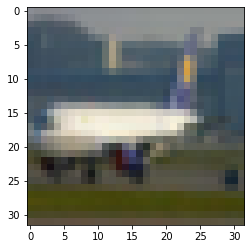

In [131]:
index=93
plt.imshow(all_imgs[:,:,:,index].permute(1,2,0))
print(class_names[cifar10[index][1]])

### Normalizing data

In [132]:
mean=all_imgs.view(3,-1).mean(dim=1)
std=all_imgs.view(3,-1).std(dim=1)
print(mean,std)
transformed_cifar10=datasets.CIFAR10(dir_path,train=True,download=False,transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=mean,std=std)]))
transformed_cifar10_val=datasets.CIFAR10(dir_path,train=False,download=False,transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=mean,std=std)]))

tensor([0.4914, 0.4822, 0.4465]) tensor([0.2470, 0.2435, 0.2616])


##### Some tests

(<matplotlib.image.AxesImage at 0x7fb095c11650>, 'airplane')

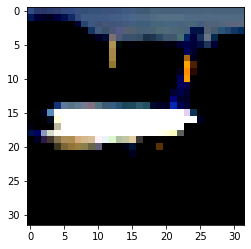

In [133]:
img_t,label=transformed_cifar10[index]
plt.imshow(img_t.permute(1,2,0)),class_names[label]

### Extracting birds and airplanes data

In [134]:
# class_names[0] --> airplane
# class_names[2] --> bird
labels=['airplane','bird']
cifar2=[(img,4%(label+1)) for img,label in transformed_cifar10 if label in [0,2]]
cifar2_val=[(img,4%(label+1)) for img,label in transformed_cifar10_val if label in [0,2]]

##### Some tests:

10000 2000


(<matplotlib.image.AxesImage at 0x7fb097e1dd90>, 'airplane')

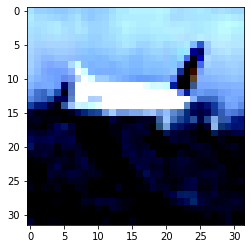

In [135]:
index=35
print(len(cifar2),len(cifar2_val))
plt.imshow(cifar2[index][0].permute(1,2,0)),labels[cifar2[index][1]]